In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 

In [62]:
VEGETABLE = 'peas'
df = pd.read_csv("./../data/"+VEGETABLE+'.csv')
df.columns
df.head()

,Unnamed: 0,DATE,MODAL
0,0,2002-08-26,675.0
1,1,2002-09-04,500.0
2,2,2003-01-23,1175.0
3,3,2003-01-24,950.0
4,4,2003-01-27,950.0


In [63]:

# df = df.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
#        'MIN', 'MAX'], axis= 1)
df = df.drop(['Unnamed: 0'], axis= 1)

df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df = df.set_index("DATE")
df['MODAL'] = df['MODAL'].apply(lambda x: float(x))

In [64]:
df.head()

,MODAL
DATE,
2002-08-26,675.0
2002-09-04,500.0
2003-01-23,1175.0
2003-01-24,950.0
2003-01-27,950.0


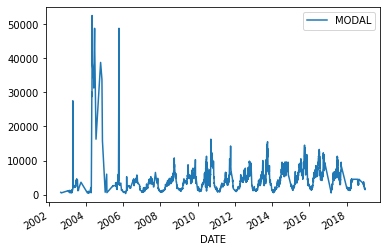

In [65]:
df.plot()

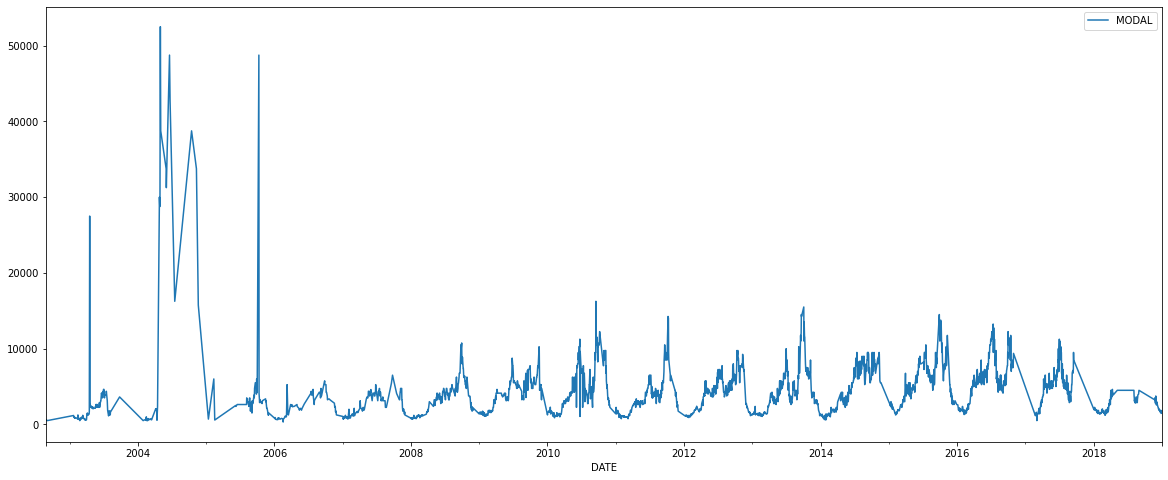

In [43]:
df = df.dropna()
df = df.resample('1D').interpolate(method= "linear")
fig, axes = plt.subplots(figsize=(20,8))
df.plot(ax= axes)
plt.show()

In [44]:
df = df.reset_index()

In [45]:

df = df[2685:]
df.head()

,DATE,MODAL
2685,2010-01-01,1250.0
2686,2010-01-02,1525.0
2687,2010-01-03,1575.0
2688,2010-01-04,1625.0
2689,2010-01-05,1600.0


In [46]:
df = df.reset_index()
df  = df.drop(['index'], axis=1)

In [47]:
df.to_csv(VEGETABLE+"_processed.csv")

In [48]:
THRESHOLD_DEVIATION = 3
from math import sqrt 
df_mod = df.copy()
count = 0
for i in range(1, len(df)):
    start = max(i-7,0)
    end = i-1
    N = (end-start+1)
    if N==0:
        print("N is 0")
    mean = sum(df['MODAL'][start:end+1])/N
    std = sqrt(sum(((df['MODAL']-mean)**2)[start:end+1])/N)
    z_score = (df_mod['MODAL'][i] - mean)/std
    if abs(z_score) > THRESHOLD_DEVIATION:
#         df_mod['MODAL'][i] = np.nan
        df_mod['MODAL'][i] = mean
        count += 1
print(count)


/home/siram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/home/siram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/siram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


251


In [52]:
df_mod.head()
df_mod = df_mod.set_index('DATE')

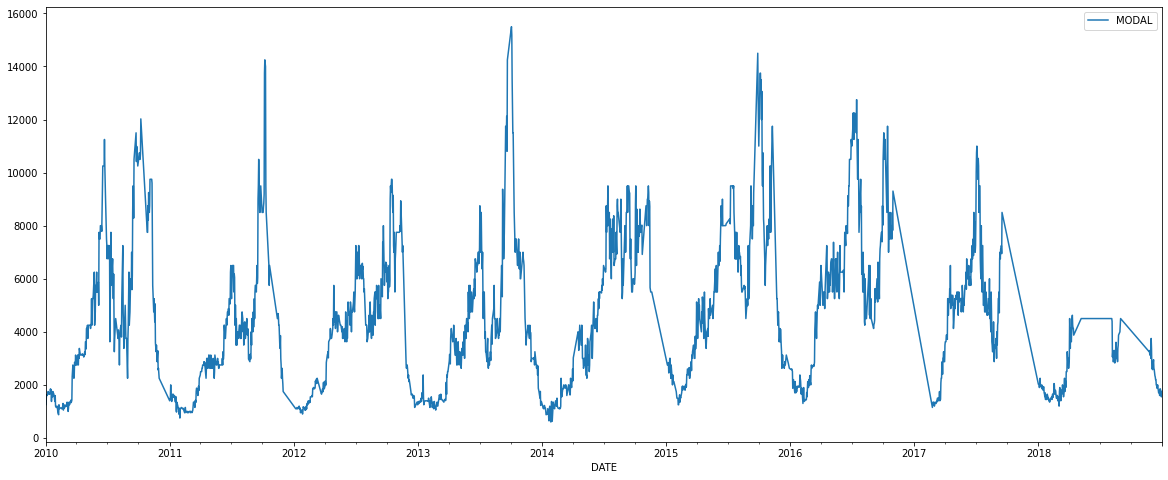

In [53]:
fig, axes = plt.subplots(figsize=(20,8))
df_mod.plot(ax= axes)
plt.show()

In [54]:
df_mod = df_mod.dropna()
df_mod = df_mod.resample('1D').interpolate(mehod= "linear")

In [55]:
# import plotly.plotly as py
import plotly.graph_objs as go
# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

data = go.Scatter(x=df_mod.index,
                         y=df_mod['MODAL'].values)
layout = go.Layout(title='Vegetable Pice Plot', xaxis=dict(title='Date'),
                   yaxis=dict(title='Price per Quintal'))
fig = go.Figure(data=[data], layout=layout)
# py.iplot(fig, sharing='public')
fig.show()

In [56]:
(df_mod.reset_index()).to_csv(VEGETABLE+"_NO_OUTLIERS.csv")

In [57]:
len(df_mod)

3286